# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('blackFriday_train.csv')

In [3]:
print(data.shape)

(550068, 12)


In [4]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [5]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
data1 = pd.read_csv('blackFriday_test.csv')

In [7]:
data1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


In [8]:
data2 = data.append(data1, sort = False)

In [9]:
data2.shape

(783667, 12)

In [10]:
data2.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [12]:
data2.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [13]:
data2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
data2.drop('User_ID',axis =1, inplace = True)

In [15]:
def change():
    for i in data2['Gender']:
        if i == 'M':
            return 1
        else:
            return 0

In [16]:
data2.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
data2['Gender']=data2['Gender'].map({'F':0, 'M':1})

In [18]:
data2.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [19]:
data2['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [21]:
data2.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 71.7+ MB


In [23]:
data2['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [24]:
data2['Age'] = data2['Age'].map({'0-17' : 1, '55+' : 7, '26-35' : 3, '46-50' : 5, '51-55' : 6, '36-45' : 4 , '18-25' : 2})

In [25]:
data2.head(15)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,3,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1,5,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,5,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1,5,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1,3,20,A,1,1,8,NaN,NaN,7871.0


In [26]:
city = pd.get_dummies(data2['City_Category'])

In [27]:
city

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
233594,0,1,0
233595,0,1,0
233596,0,1,0
233597,0,0,1


In [28]:
city1 = pd.get_dummies(data2['City_Category'], drop_first = True)

In [29]:
city1

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [30]:
data2 = pd.concat([data2,city1], axis = 1)

In [31]:
data2.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [32]:
data2.rename(columns = {'B' : 'city_category1', 'C' : 'city_category2'}, inplace = True)

In [33]:
data2.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,city_category1,city_category2
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  city_category1              783667 non-null  uint8  
 12  city_category2              783667 non-null  uint8  
dtypes: float64(3),

In [35]:
data2['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [36]:
data2.drop('City_Category',axis = 1, inplace = True)

In [37]:
data2.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,city_category1,city_category2
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [38]:
data2.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
city_category1                     0
city_category2                     0
dtype: int64

In [39]:
data2.rename(columns = {'Product_Category_1' : 'cat1', 'Product_Category_2':'cat2', 'Product_Category_3': 'cat3'}, inplace = True)

In [40]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        537685 non-null  float64
 8   cat3                        237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  city_category1              783667 non-null  uint8  
 11  city_category2              783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [41]:
data2['cat2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [42]:
data2.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'city_category1', 'city_category2'],
      dtype='object')

In [43]:
data2.cat2.mode()

0    8.0
dtype: float64

In [44]:
data2.cat3.mode()

0    16.0
dtype: float64

In [45]:
data2['cat2'] = data2['cat2'].fillna(data2['cat2'].mode()[0])

In [46]:
data2.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,city_category1,city_category2
0,P00069042,0,1,10,2,0,3,8.0,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,NaN,7969.0,0,1


In [47]:
data2['cat3'] = data2['cat3'].fillna(data2['cat3'].mode()[0])

In [48]:
data2.head(15)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,city_category1,city_category2
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1
5,P00193542,1,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,P00184942,1,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,P00346142,1,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,P0097242,1,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,P00274942,1,3,20,1,1,8,8.0,16.0,7871.0,0,0


In [49]:
data['Purchase'].mean()

9263.968712959126

In [50]:
data2['Purchase'] = data2['Purchase'].fillna(data2['Purchase'].mean())

In [51]:
data2.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,city_category1,city_category2
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [52]:
data2.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'city_category1', 'city_category2'],
      dtype='object')

In [53]:
column_names = ['Product_ID', 'Gender', 'Age','Occupation','Stay_In_Current_City_Years','Marital_Status','cat1','cat2','cat3','city_category1','city_category2','Purchase']

In [54]:
data2 = data2.reindex(columns = column_names)

In [55]:
data2.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,city_category1,city_category2,Purchase
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0,8370.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0,15200.0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0,1422.0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0,1057.0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,0,1,7969.0


In [56]:
data2.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
city_category1                0
city_category2                0
Purchase                      0
dtype: int64

In [57]:
columns = data2.columns

In [58]:
for column in columns:
    if data2[column].dtype == 'object':
        print(column,"total unique values are :",data2[column].unique(),'\n')

Product_ID total unique values are : ['P00069042' 'P00248942' 'P00087842' ... 'P00030342' 'P00074942'
 'P00253842'] 

Stay_In_Current_City_Years total unique values are : ['2' '4+' '3' '1' '0'] 



In [59]:
data2['Stay_In_Current_City_Years']=data2.Stay_In_Current_City_Years.str.replace('+','')

In [60]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   city_category1              783667 non-null  uint8  
 10  city_category2              783667 non-null  uint8  
 11  Purchase                    783667 non-null  float64
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


# converting the datatypes into integer ones as the datatype for these columns are shown as unsigned int in the info above

In [61]:
data2['Stay_In_Current_City_Years'] = data2['Stay_In_Current_City_Years'].astype(int)
data2['city_category1'] = data2['city_category1'].astype(int)
data2['city_category2'] = data2['city_category2'].astype(int)

In [62]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   city_category1              783667 non-null  int32  
 10  city_category2              783667 non-null  int32  
 11  Purchase                    783667 non-null  float64
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [63]:
df_i = data2.copy()

In [64]:
df_i.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,city_category1,city_category2,Purchase
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0,8370.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0,15200.0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0,1422.0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0,1057.0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1,7969.0


In [65]:
df_i.drop('Product_ID',axis = 1, inplace =True)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

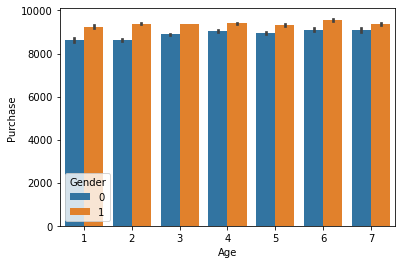

In [66]:
sns.barplot(x = 'Age', y= 'Purchase', hue = 'Gender', data = df_i)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

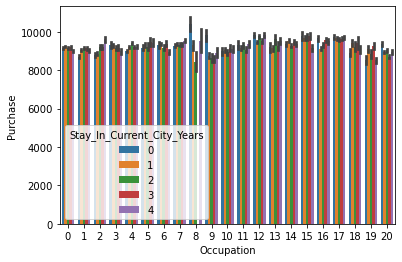

In [67]:
sns.barplot(x = 'Occupation',y = 'Purchase',hue='Stay_In_Current_City_Years',data = df_i)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

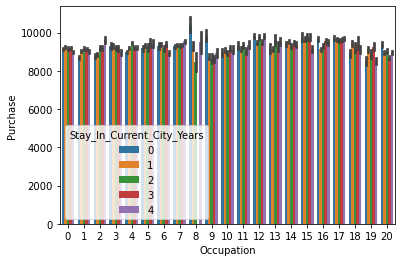

In [68]:
sns.barplot(x = 'Occupation', y = 'Purchase', hue = 'Stay_In_Current_City_Years', data = df_i)

<AxesSubplot:xlabel='cat1', ylabel='Purchase'>

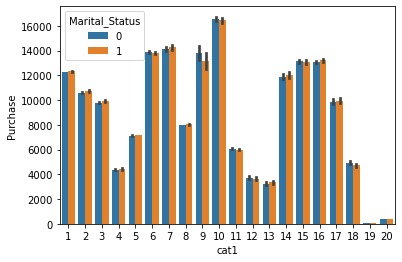

In [70]:
sns.barplot(x =  'cat1',y = 'Purchase',hue='Marital_Status',data=df_i)

<AxesSubplot:xlabel='cat2', ylabel='Purchase'>

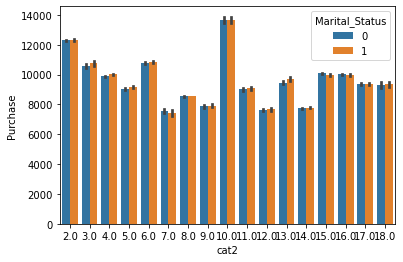

In [71]:
sns.barplot(x = 'cat2', y = 'Purchase',hue='Marital_Status',data=df_i)

<AxesSubplot:xlabel='cat3', ylabel='Purchase'>

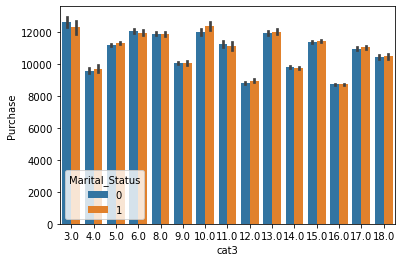

In [72]:
sns.barplot(x = 'cat3', y = 'Purchase',hue='Marital_Status',data=df_i)

In [73]:
X = df_i.drop('Purchase', axis = 1)

In [74]:
y = df_i.Purchase

In [75]:
X

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,city_category1,city_category2
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,8.0,16.0,1,0
233595,0,3,15,4,1,5,8.0,16.0,1,0
233596,0,3,15,4,1,1,5.0,12.0,1,0
233597,0,5,1,4,0,10,16.0,16.0,0,1


In [76]:
y

0          8370.000000
1         15200.000000
2          1422.000000
3          1057.000000
4          7969.000000
              ...     
233594     9263.968713
233595     9263.968713
233596     9263.968713
233597     9263.968713
233598     9263.968713
Name: Purchase, Length: 783667, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 5)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
print(X_train)

[[ 0.57275431 -0.36745197  0.6008837  ...  0.36937114  1.17365495
  -0.67228678]
 [ 0.57275431 -0.36745197 -1.23913919 ...  0.36937114 -0.85203918
  -0.67228678]
 [ 0.57275431  1.10995723 -0.16579251 ...  0.36937114  1.17365495
  -0.67228678]
 ...
 [ 0.57275431  1.84866184  1.67423038 ...  0.36937114 -0.85203918
   1.48746045]
 [ 0.57275431 -1.10615657 -0.93246871 ...  0.36937114 -0.85203918
  -0.67228678]
 [ 0.57275431 -0.36745197 -1.23913919 ...  0.36937114 -0.85203918
   1.48746045]]


In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
reg = LinearRegression()

In [82]:
reg.fit(X_train,y_train)

LinearRegression()

In [83]:
y_pred = reg.predict(X_test)

In [84]:
y_pred

array([ 9713.93481986,  7917.32641722,  8756.07816638, ...,
       11544.96710785,  6579.39944511,  9389.5583129 ])

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
reg.score(X_train,y_train)

0.09448233664545669

In [102]:
from sklearn.linear_model import LassoCV,Lasso,LogisticRegression

In [90]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [91]:
alpha = lasscv.alpha_
alpha

0.0016073151343866789

In [93]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0016073151343866789)

In [95]:
lasso_reg.score(X_test, y_test)

0.09348987443935064

In [96]:

from sklearn.tree import DecisionTreeRegressor

In [97]:

regressor = DecisionTreeRegressor(random_state=0)

In [98]:
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [101]:
regressor.score(X,y)

0.6179818195658401

In [104]:
clf = LogisticRegression(random_state=0)